In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

In [2]:
df = pd.read_csv(
    'spam.csv',
    encoding='latin-1'
)
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [4]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [5]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.rename(columns={'v1': 'spam', 'v2': 'sms'}, inplace=True)

### Encoding the target variable 'spam'

In [7]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
df['spam'] = enc.fit_transform(df['spam'])
y = df['spam']
df.head()

,spam,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Text preprocessing

In [8]:
import re
from bs4 import BeautifulSoup
def clean_text(string):
    string = re.sub("http\S+", " ", string)
    string = BeautifulSoup(string, 'lxml')
    string = string.get_text()
    string = re.sub('[^A-Za-z]+', ' ', string)
    string = re.sub(r"n\'t", " not", string)
    string = re.sub(r"\'re", " are", string)
    string = re.sub(r"\'s", " is", string)
    string = re.sub(r"\'d", " would", string)
    string = re.sub(r"\'ll", " will", string)
    string = re.sub(r"\'t", " not", string)
    string = re.sub(r"\'ve", " have", string)
    string = re.sub(r"\'m", " am", string)
    return string

from nltk.stem import PorterStemmer
global_stemmer = PorterStemmer()
def normalize_text(tokens):
    tokens = [token.lower() for token in tokens]
    tokens = [global_stemmer.stem(token) for token in tokens]
    return tokens

In [9]:
import nltk
print(nltk.data.path)

['/home/sudip/nltk_data', '/home/sudip/Desktop/spam_detection_bayes/.venv/nltk_data', '/home/sudip/Desktop/spam_detection_bayes/.venv/share/nltk_data', '/home/sudip/Desktop/spam_detection_bayes/.venv/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


In [10]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
from nltk.corpus import stopwords
eng_stopwords = stopwords.words('english')

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /home/sudip/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/sudip/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/sudip/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [11]:
corpus = []

for message in df['sms']:
  message = clean_text(message)
  tokens = word_tokenize(message)
  tokens = normalize_text(tokens)
  tokens = [token for token in tokens if token not in eng_stopwords]
  string = " ".join(tokens)
  corpus.append(string)

for document in corpus[:6]:
  print(document)

go jurong point crazi avail onli bugi n great world la e buffet cine got amor wat
ok lar joke wif u oni
free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli
u dun say earli hor u c alreadi say
nah think goe usf live around though
freemsg hey darl week word back like fun still tb ok xxx std chg send rcv


In [43]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=500)
X = vectorizer.fit_transform(corpus).toarray()
pd.DataFrame(X, columns=vectorizer.get_feature_names_out())

,abl,abt,account,actual,address,afternoon,age,ah,aight,alreadi,...,xxx,ya,ye,yeah,year,yesterday,yet,yo,yr,yup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### We gotta export the vectorizer as well

In [13]:
import joblib

joblib.dump(vectorizer, "vectorizer.joblib")

['vectorizer.joblib']

### Splitting into train test set

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0, stratify=y)

### Fitting the Multinomial Naive Bayes classifier

In [15]:
from sklearn.naive_bayes import MultinomialNB

multinomial_nb = MultinomialNB()
multinomial_nb.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


### Dumping the trained model in joblib format

In [16]:
import joblib

joblib.dump(multinomial_nb, 'multinomial.joblib')

['multinomial.joblib']

### Making predictions

In [17]:
y_pred = multinomial_nb.predict_proba(X_test)
pd.DataFrame(y_pred, columns=['P(y=0|X)', 'P(y=1|X)']).head(5)

,P(y=0|X),P(y=1|X)
0,0.999217,7.830591e-04
1,0.999999,1.002269e-06
2,0.999974,2.628669e-05
3,0.980933,1.906680e-02
4,1.000000,4.413286e-07


In [18]:
y_pred = multinomial_nb.predict(X_test)
pd.DataFrame(y_pred, columns=['Predicted']).head()

,Predicted
0,0
1,0
2,0
3,0
4,0


### Model Evaluation

In [19]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy = ', accuracy)

Accuracy =  0.9704035874439462


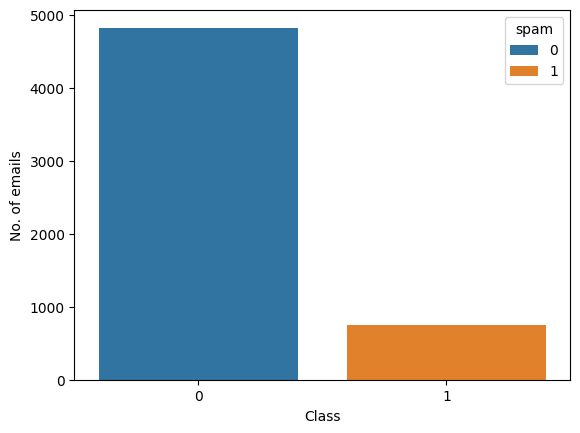

In [20]:
import seaborn as sns

sns.countplot(x='spam', hue="spam", data=df)
plt.xlabel("Class")
plt.ylabel("No. of emails")
plt.show()

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

print("Precision = {:.4f}".format(precision))
print("Recall = {:.4f}".format(recall))
print("F1 score = {:.4f}".format(f1score))

Precision = 0.9143
Recall = 0.8591
F1 score = 0.8858


### Checking the accuracy of the exported model to see if its really the one

In [22]:
exported = joblib.load("multinomial.joblib")

exported_predictions = exported.predict(X_test)
print("Accuracy = ", accuracy_score(y_test, exported_predictions))
print("Precitions = {:.4f}".format(precision_score(y_test, y_pred)))
print("Recall = {:.4f}".format(recall_score(y_test, y_pred)))
print("F1 score = {:.4f}".format(f1_score(y_test, y_pred)))

Accuracy =  0.9704035874439462
Precitions = 0.9143
Recall = 0.8591
F1 score = 0.8858


### Checking it on a single text.

In [44]:
text_to_check = "This is your daily reminder that everyday is the new day of rest of your life."

cleaned = clean_text(text_to_check)
tokens = word_tokenize(cleaned)
tokens = normalize_text(tokens)
tokens = [token for token in tokens if token not in eng_stopwords]
processed_text = " ".join(tokens)
vectorizedd = vectorizer.transform([processed_text])
print(processed_text)

thi daili remind everyday new day rest life


In [45]:
print(vectorizedd)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 4 stored elements and shape (1, 500)>
  Coords	Values
  (0, 93)	1
  (0, 228)	1
  (0, 282)	1
  (0, 415)	1


In [47]:
proba = multinomial_nb.predict_proba(vectorizedd)[0]
prediction = multinomial_nb.predict(vectorizedd)[0]

if prediction == 1:
    print('Spam')
else:
    print('Ham')

print("Probability of spam: {:.4f}".format(proba[1]))
print("Probability of ham: {:.4f}".format(proba[0]))

Ham
Probability of spam: 0.0201
Probability of ham: 0.9799
